# Multilayer Perceptron

In [1]:
#Importando Dependências
import numpy as np
import pandas as pd

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [5]:
#Desabilitando warning
pd.set_option('mode.chained_assignment',None)

### Carregando os dados

In [6]:
#Lendo os dados
matriculas = pd.read_csv("data/out.csv")

In [7]:
matriculas.shape

(68752, 31)

In [8]:
y = matriculas[['categoria_situacao']]

In [9]:
x = matriculas[[
    'data_matricula',
    'mes_ocorrencia',
    'idade',
    'total_inscritos',
    'fim_ciclo',
    'carga_horaria',
    'inicio_ciclo',
    'faixa_etaria',
    'codigo_unidade_ensino_sistec',
    'vagas_ofertadas',
    'codigo_municipio_dv',
    'cor_raca',
    'municipio',
    'unidade_ensino',
    'renda_familiar'
]]

### Nomes dos campos

In [10]:
nomes = list(x.columns.values)

### Convertendo variáveis categóricas em numéricas

In [11]:
le = LabelEncoder()
for n in nomes: 
    x[n] = le.fit_transform(x[n])

In [12]:
y['categoria_situacao'] = le.fit_transform(y['categoria_situacao'])

### Dimensionando campos com MinMaxScaler

In [13]:
min_max_scaler = MinMaxScaler()
for n in nomes:
    x[[n]] = min_max_scaler.fit_transform(x[[n]])

In [14]:
x

,data_matricula,mes_ocorrencia,idade,total_inscritos,fim_ciclo,carga_horaria,inicio_ciclo,faixa_etaria,codigo_unidade_ensino_sistec,vagas_ofertadas,codigo_municipio_dv,cor_raca,municipio,unidade_ensino,renda_familiar
0,0.083032,0.071918,0.142857,0.019488,0.598605,0.904301,0.654801,0.1,0.396789,0.221519,0.913366,0.6,0.182045,0.195853,0.833333
1,0.083032,0.058219,0.142857,0.007795,0.597971,0.434409,0.654801,0.1,0.396789,0.221519,0.913366,0.6,0.182045,0.195853,0.833333
2,0.083032,0.017123,0.333333,0.007795,0.597971,0.434409,0.654801,0.3,0.396789,0.221519,0.913366,0.6,0.182045,0.195853,0.833333
3,0.140794,0.065068,0.444444,0.007795,0.597971,0.434409,0.654801,0.5,0.396789,0.221519,0.913366,0.6,0.182045,0.195853,0.833333
4,0.140794,0.017123,0.333333,0.007795,0.597971,0.434409,0.654801,0.3,0.396789,0.221519,0.913366,0.6,0.182045,0.195853,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68747,0.093863,0.041096,0.079365,0.097439,0.493976,0.350538,0.981788,0.0,0.325688,0.278481,0.492574,0.0,0.571072,0.552995,0.000000
68748,0.151625,0.047945,0.158730,0.063474,0.693088,0.191398,0.834437,0.1,0.119266,0.234177,0.564356,0.0,0.254364,0.269585,0.000000
68749,0.191336,0.047945,0.206349,0.018931,0.563094,0.163441,0.153146,0.2,0.552752,0.000000,0.943069,0.0,0.029925,0.023041,0.000000
68750,0.238267,0.020548,0.253968,0.038419,0.564997,0.279570,0.666391,0.2,0.327982,0.189873,0.957921,0.0,0.356608,0.361751,0.666667


### Treinamento

In [15]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.20, random_state=42)
classificador = MLPClassifier(random_state=42, max_iter=300)
classificador.fit(x_treino, y_treino.values.ravel())

/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=42)

### Métricas

In [16]:
#Realizando a predição
resultado = classificador.predict(x_teste)

In [17]:
# Imports
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

metricas = ['accuracy','precision','recall','roc_auc','f1']

In [18]:
#Holdout
metrica_holdout = {}
metrica_holdout['accuracy'] = accuracy_score(y_teste,resultado)
metrica_holdout['precision'] = precision_score(y_teste,resultado)
metrica_holdout['recall'] = recall_score(y_teste,resultado)
metrica_holdout['roc_auc'] = roc_auc_score(y_teste,resultado)
metrica_holdout['f1'] = f1_score(y_teste,resultado)

for metrica in metricas:    
    print('holdout ' + metrica+ ': ', np.mean(metrica_holdout[metrica]))

holdout accuracy:  0.7912151843502291
holdout precision:  0.8542949587725707
holdout recall:  0.8473084886128365
holdout roc_auc:  0.7530358136048783
holdout f1:  0.8507873811132477


In [19]:
#Cros validation
from sklearn.model_selection import cross_val_score
metrica_cross = {}

for metrica in metricas:
    metrica_cross[metrica] = cross_val_score(classificador, x, y.values.ravel(), cv=15, n_jobs=-1, scoring=metrica)
    print('cross ' + metrica+ ': ', np.mean(metrica_cross[metrica]))

/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

cross accuracy:  0.7426846464607231


/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

cross precision:  0.7871578582009964


/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

cross recall:  0.8702518839763816


/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

cross roc_auc:  0.7973239597156927


/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

cross f1:  0.825061520872503


/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
mean_squared_error(y_teste,resultado)

0.20878481564977092

In [21]:
classificador.score(x_teste,y_teste)

0.7912151843502291

In [22]:
score = f1_score(y_teste, resultado,average='weighted')
print(score)

0.7917848736789155


### Matriz de confusão

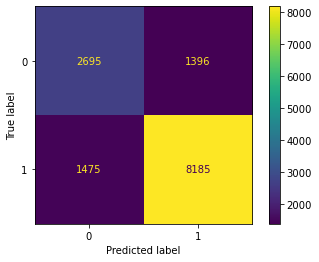

In [23]:
ConfusionMatrixDisplay.from_predictions(y_teste, resultado)
plt.show()

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

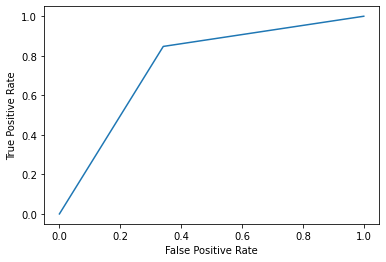

In [25]:
fpr, tpr, _ = roc_curve(y_teste, resultado)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [26]:
roc_auc_score(y_teste, resultado)

0.7530358136048783